<a href="https://colab.research.google.com/github/asafuM-56/Week-3-Worksheet/blob/main/WEEK_3_WORKSHEET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading the Dataset

In [ ]:
#Loading the Dataset
import pandas as pd

# Loading the Dataset using the file path method
file_path = '/content/SAF Dataset.xlsx'

# Read the Excel file into a Pandas DataFrame
df = pd.read_excel(file_path)

print(df.head())  # Print the first few rows of the DataFrame
print(df.describe())

       C (%)      H (%)     N (%)      O (%)     S (%)     VM (%)    Ash (%)  \
0  53.041259   6.390897  0.871969  39.366227  0.329647  82.070081   4.884097   
1  52.846674   6.186584  0.436866  40.219842  0.310034  70.783562  12.000000   
2  40.020000   6.010000  0.880000  52.860000  0.230000  72.294705  10.020831   
3  45.739910  10.762332  7.036909  34.908589  1.552259  49.357766  42.020000   
4  44.480000   6.280000  8.210000  40.490000  0.540000  77.497780   6.472025   

      FC (%)    Cel (%)    Hem (%)    Lig (%) Location   \
0  13.045822  37.260000  14.620000  31.680000        US   
1  17.216438  31.300000  24.300000  14.100000        US   
2  17.684464  35.000000  27.500000  10.000000        US   
3   8.626970  35.000000  25.000000  26.500000        US   
4  16.030195  22.775726  55.419525   2.955145        US   

   Plant capacity (kg/hr)   MSP  
0                   25000  0.64  
1                   25000  0.63  
2                   25000  0.69  
3                   25000  0

Organize into numerical and categorical variables

In [ ]:
# Get the data types of each column
data_types = df.dtypes

# Print the data types
print(data_types)

# Identify numeric and categorical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print("\nNumeric columns:", numeric_cols)
print("\nCategorical columns:", categorical_cols)

C (%)                     float64
H (%)                     float64
N (%)                     float64
O (%)                     float64
S (%)                     float64
VM (%)                    float64
Ash (%)                   float64
FC (%)                    float64
Cel (%)                   float64
Hem (%)                   float64
Lig (%)                   float64
Location                   object
Plant capacity (kg/hr)      int64
MSP                       float64
dtype: object

Numeric columns: Index(['C (%)', 'H (%)', 'N (%)', 'O (%)', 'S (%)', 'VM (%)', 'Ash (%)',
       'FC (%)', 'Cel (%)', 'Hem (%)', 'Lig (%)', 'Plant capacity (kg/hr)',
       'MSP'],
      dtype='object')

Categorical columns: Index(['Location '], dtype='object')


Check for missing variables, and deal with missing data

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

# Remove rows with missing values in categorical columns
df = df.dropna(subset=categorical_cols)

# Replace missing values in numeric columns with the mean
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Verify that missing values have been removed
missing_values_after_cleaning = df.isnull().sum()
print("\nMissing values after cleaning:\n", missing_values_after_cleaning)

Missing values:
 C (%)                     0
H (%)                     0
N (%)                     0
O (%)                     0
S (%)                     0
VM (%)                    0
Ash (%)                   0
FC (%)                    0
Cel (%)                   0
Hem (%)                   0
Lig (%)                   0
Location                  0
Plant capacity (kg/hr)    0
MSP                       0
dtype: int64

Missing values after cleaning:
 C (%)                     0
H (%)                     0
N (%)                     0
O (%)                     0
S (%)                     0
VM (%)                    0
Ash (%)                   0
FC (%)                    0
Cel (%)                   0
Hem (%)                   0
Lig (%)                   0
Location                  0
Plant capacity (kg/hr)    0
MSP                       0
dtype: int64


There is no missing data

Detecting Outliers using a boxplot

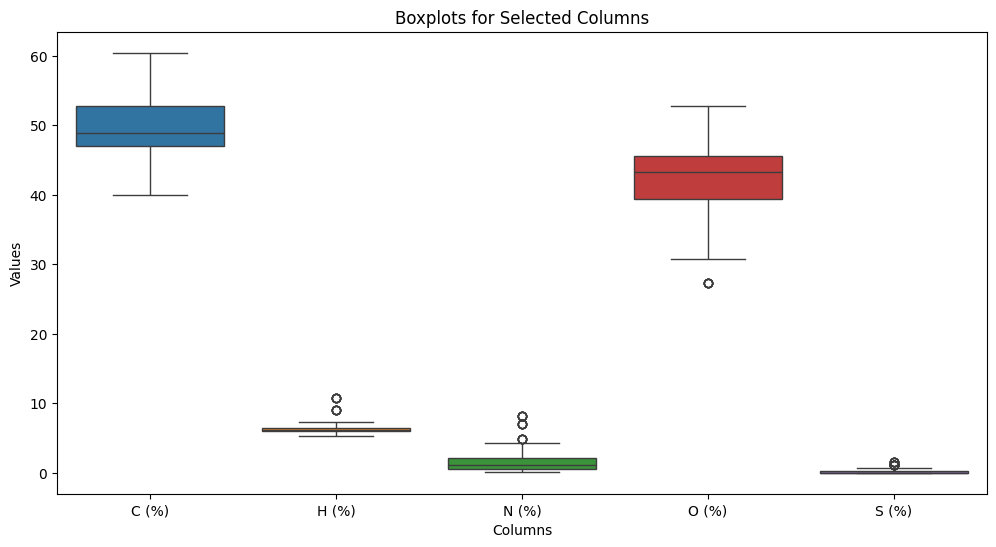

Outliers detected in the following columns:
C (%)     0
H (%)    12
N (%)    18
O (%)     6
S (%)    18
dtype: int64


In [ ]:
#Looking for outliers

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define columns of interest
columns_of_interest = ['C (%)', 'H (%)', 'N (%)', 'O (%)', 'S (%)']

# Calculate the interquartile range (IQR) for each column
Q1 = df[columns_of_interest].quantile(0.25)
Q3 = df[columns_of_interest].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier threshold
outlier_threshold = 1.5 * IQR

# Identify outliers
outliers = (df[columns_of_interest] < (Q1 - outlier_threshold)) | (df[columns_of_interest] > (Q3 + outlier_threshold))

# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Create the boxplot
sns.boxplot(data=df[columns_of_interest], ax=ax)

# Set labels and title
ax.set_title('Boxplots for Selected Columns')
ax.set_xlabel('Columns')
ax.set_ylabel('Values')

plt.show()

# Check if outliers exist
if outliers.any().any():
    print("Outliers detected in the following columns:")
    print(outliers.sum())
else:
    print("No outliers detected.")

Because of the way the dataset works, an outlier in one of these columns will impact the rest of the columns, so the row with the outlier should be removed

Code for removing outliers

In [ ]:
# Define the columns to check for outliers
columns_of_interest = ['C (%)', 'H (%)', 'N (%)', 'O (%)', 'S (%)']

# Function to detect outliers using IQR
def remove_outliers_iqr(df, columns):
    q1 = df[columns].quantile(0.25)
    q3 = df[columns].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 2 * iqr
    upper_bound = q3 + 2 * iqr
    outliers = (df[columns] < lower_bound) | (df[columns] > upper_bound)
    return df[~outliers]

# Remove outliers and store the result in a new DataFrame
df_cleaned = remove_outliers_iqr(df, columns_of_interest)

# Save the cleaned DataFrame to a new Excel file
df_cleaned.to_excel('cleaned_data.xlsx', index=False)

Show the summary statistics for the data

In [ ]:
def summarize_numerical_columns(file_path):
  """
  Calculates summary statistics for all numerical columns in an Excel file.

  Args:
    file_path: The path to the Excel file.

  Returns:
    A DataFrame containing the summary statistics.
  """

  # Read the Excel file into a DataFrame
  df = pd.read_excel(file_path)

  # Select only the numerical columns
  numerical_columns = df.select_dtypes(include='number')

  # Calculate summary statistics
  summary_stats = numerical_columns.describe()

  return summary_stats

# Example usage
summary = summarize_numerical_columns(file_path)
print(summary)

            C (%)       H (%)       N (%)       O (%)       S (%)      VM (%)  \
count  186.000000  186.000000  186.000000  186.000000  186.000000  186.000000   
mean    49.506202    6.418846    1.793219   42.060283    0.221450   75.465442   
std      4.002631    1.037071    1.949253    5.059810    0.392152    9.172079   
min     40.020000    5.320000    0.100000   27.360000    0.000000   49.357766   
25%     47.014626    5.980000    0.490884   39.366227    0.000000   71.700000   
50%     48.867116    6.174469    1.171271   43.280000    0.000000   76.555556   
75%     52.846674    6.500000    2.189781   45.557022    0.310034   81.797235   
max     60.460000   10.762332    8.210000   52.860000    1.552259   94.161220   

          Ash (%)      FC (%)     Cel (%)     Hem (%)     Lig (%)  \
count  186.000000  186.000000  186.000000  186.000000  186.000000   
mean     8.694476   15.840234   33.685306   26.992285   21.840139   
std      9.878574    6.382265    9.955842    9.737054   10.9847

All of the columns can be described as being Normally distributed.

One-Hot Encoding

In [ ]:
#Checking the data types
print(df.columns)

# Check the data types to indentify numeric columns
df.dtypes

Index(['C (%)', 'H (%)', 'N (%)', 'O (%)', 'S (%)', 'VM (%)', 'Ash (%)',
       'FC (%)', 'Cel (%)', 'Hem (%)', 'Lig (%)', 'Location ',
       'Plant capacity (kg/hr)', 'MSP'],
      dtype='object')


,0
C (%),float64
H (%),float64
N (%),float64
O (%),float64
S (%),float64
VM (%),float64
Ash (%),float64
FC (%),float64
Cel (%),float64
Hem (%),float64


Plant capacity is a categorical variable listed as an integer

In [ ]:
# Convert the column to object data type
df['Plant capacity (kg/hr)'] = df['Plant capacity (kg/hr)'].astype(object)

print(df.dtypes)

C (%)                     float64
H (%)                     float64
N (%)                     float64
O (%)                     float64
S (%)                     float64
VM (%)                    float64
Ash (%)                   float64
FC (%)                    float64
Cel (%)                   float64
Hem (%)                   float64
Lig (%)                   float64
Location                   object
Plant capacity (kg/hr)     object
MSP                       float64
dtype: object


In [ ]:
#Redefing the categorical columns

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print("\nNumeric columns:", numeric_cols)
print("\nCategorical columns:", categorical_cols)


Numeric columns: Index(['C (%)', 'H (%)', 'N (%)', 'O (%)', 'S (%)', 'VM (%)', 'Ash (%)',
       'FC (%)', 'Cel (%)', 'Hem (%)', 'Lig (%)', 'MSP'],
      dtype='object')

Categorical columns: Index(['Location ', 'Plant capacity (kg/hr)'], dtype='object')


In [ ]:
# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols)

# Print the encoded DataFrame
print(df_encoded.head())

       C (%)      H (%)     N (%)      O (%)     S (%)     VM (%)    Ash (%)  \
0  53.041259   6.390897  0.871969  39.366227  0.329647  82.070081   4.884097   
1  52.846674   6.186584  0.436866  40.219842  0.310034  70.783562  12.000000   
2  40.020000   6.010000  0.880000  52.860000  0.230000  72.294705  10.020831   
3  45.739910  10.762332  7.036909  34.908589  1.552259  49.357766  42.020000   
4  44.480000   6.280000  8.210000  40.490000  0.540000  77.497780   6.472025   

      FC (%)    Cel (%)    Hem (%)    Lig (%)   MSP  Location _China  \
0  13.045822  37.260000  14.620000  31.680000  0.64            False   
1  17.216438  31.300000  24.300000  14.100000  0.63            False   
2  17.684464  35.000000  27.500000  10.000000  0.69            False   
3   8.626970  35.000000  25.000000  26.500000  0.85            False   
4  16.030195  22.775726  55.419525   2.955145  1.20            False   

   Location _UK  Location _US  Plant capacity (kg/hr)_25000  \
0         False        

In [ ]:
print(df.dtypes)

C (%)                     float64
H (%)                     float64
N (%)                     float64
O (%)                     float64
S (%)                     float64
VM (%)                    float64
Ash (%)                   float64
FC (%)                    float64
Cel (%)                   float64
Hem (%)                   float64
Lig (%)                   float64
Location                   object
Plant capacity (kg/hr)     object
MSP                       float64
dtype: object


From my review of the dataset, there are no redundant columns


Making a correlation matrix and a heatmap

In [ ]:
import pandas as pd
import numpy as np


#Make the correlation matrix
correlation_matrix = df_encoded[numeric_cols].corr()
print(correlation_matrix)

            C (%)     H (%)     N (%)     O (%)     S (%)    VM (%)   Ash (%)  \
C (%)    1.000000  0.126453 -0.032719 -0.807065  0.034686  0.237064 -0.068389   
H (%)    0.126453  1.000000  0.573039 -0.571748  0.593459 -0.331285  0.549685   
N (%)   -0.032719  0.573039  1.000000 -0.532782  0.722180 -0.381596  0.639020   
O (%)   -0.807065 -0.571748 -0.532782  1.000000 -0.504793  0.069554 -0.361904   
S (%)    0.034686  0.593459  0.722180 -0.504793  1.000000 -0.544219  0.737537   
VM (%)   0.237064 -0.331285 -0.381596  0.069554 -0.544219  1.000000 -0.777962   
Ash (%) -0.068389  0.549685  0.639020 -0.361904  0.737537 -0.777962  1.000000   
FC (%)  -0.234859 -0.374615 -0.440622  0.460170 -0.359382 -0.233046 -0.429710   
Cel (%) -0.001210 -0.089874 -0.385210  0.184982 -0.221989  0.215806 -0.198393   
Hem (%) -0.197409 -0.019329  0.321464  0.025763  0.135743 -0.096200  0.002942   
Lig (%)  0.170814 -0.086350 -0.370501  0.041167 -0.204644  0.042607 -0.217804   
MSP     -0.111393  0.093705 

The heatmap

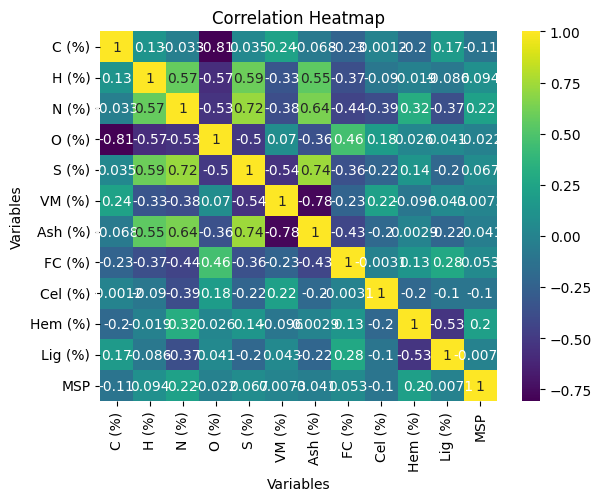

In [ ]:
#Making the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="viridis")

# Set the title and labels
plt.title("Correlation Heatmap")
plt.xlabel("Variables")
plt.ylabel("Variables")

# Show the plot
plt.show()

The strongest correlations are between Oxygen and Carbon as well as VM and ASH, which makes sense because those values are directly tiesd to each other. However, Sulfur and Nitrogen have strong correlations with Ash%, which I was surprised about. This makes sense since Ash is the inorganic content in the fuel, so it makes sense that it affects the Nitrogen and not the Carbon.

Visualizing Data Relationships

Splitting Data into Targets and Features

In [ ]:
#Splitting the Data into Target and Features
X = df_encoded.drop('MSP', axis=1)
y = df_encoded['MSP']

#display the first few rows of X and y
X.head(), y.head()

(       C (%)      H (%)     N (%)      O (%)     S (%)     VM (%)    Ash (%)  \
 0  53.041259   6.390897  0.871969  39.366227  0.329647  82.070081   4.884097   
 1  52.846674   6.186584  0.436866  40.219842  0.310034  70.783562  12.000000   
 2  40.020000   6.010000  0.880000  52.860000  0.230000  72.294705  10.020831   
 3  45.739910  10.762332  7.036909  34.908589  1.552259  49.357766  42.020000   
 4  44.480000   6.280000  8.210000  40.490000  0.540000  77.497780   6.472025   
 
       FC (%)    Cel (%)    Hem (%)    Lig (%)  Location _China  Location _UK  \
 0  13.045822  37.260000  14.620000  31.680000            False         False   
 1  17.216438  31.300000  24.300000  14.100000            False         False   
 2  17.684464  35.000000  27.500000  10.000000            False         False   
 3   8.626970  35.000000  25.000000  26.500000            False         False   
 4  16.030195  22.775726  55.419525   2.955145            False         False   
 
    Location _US  Plant 

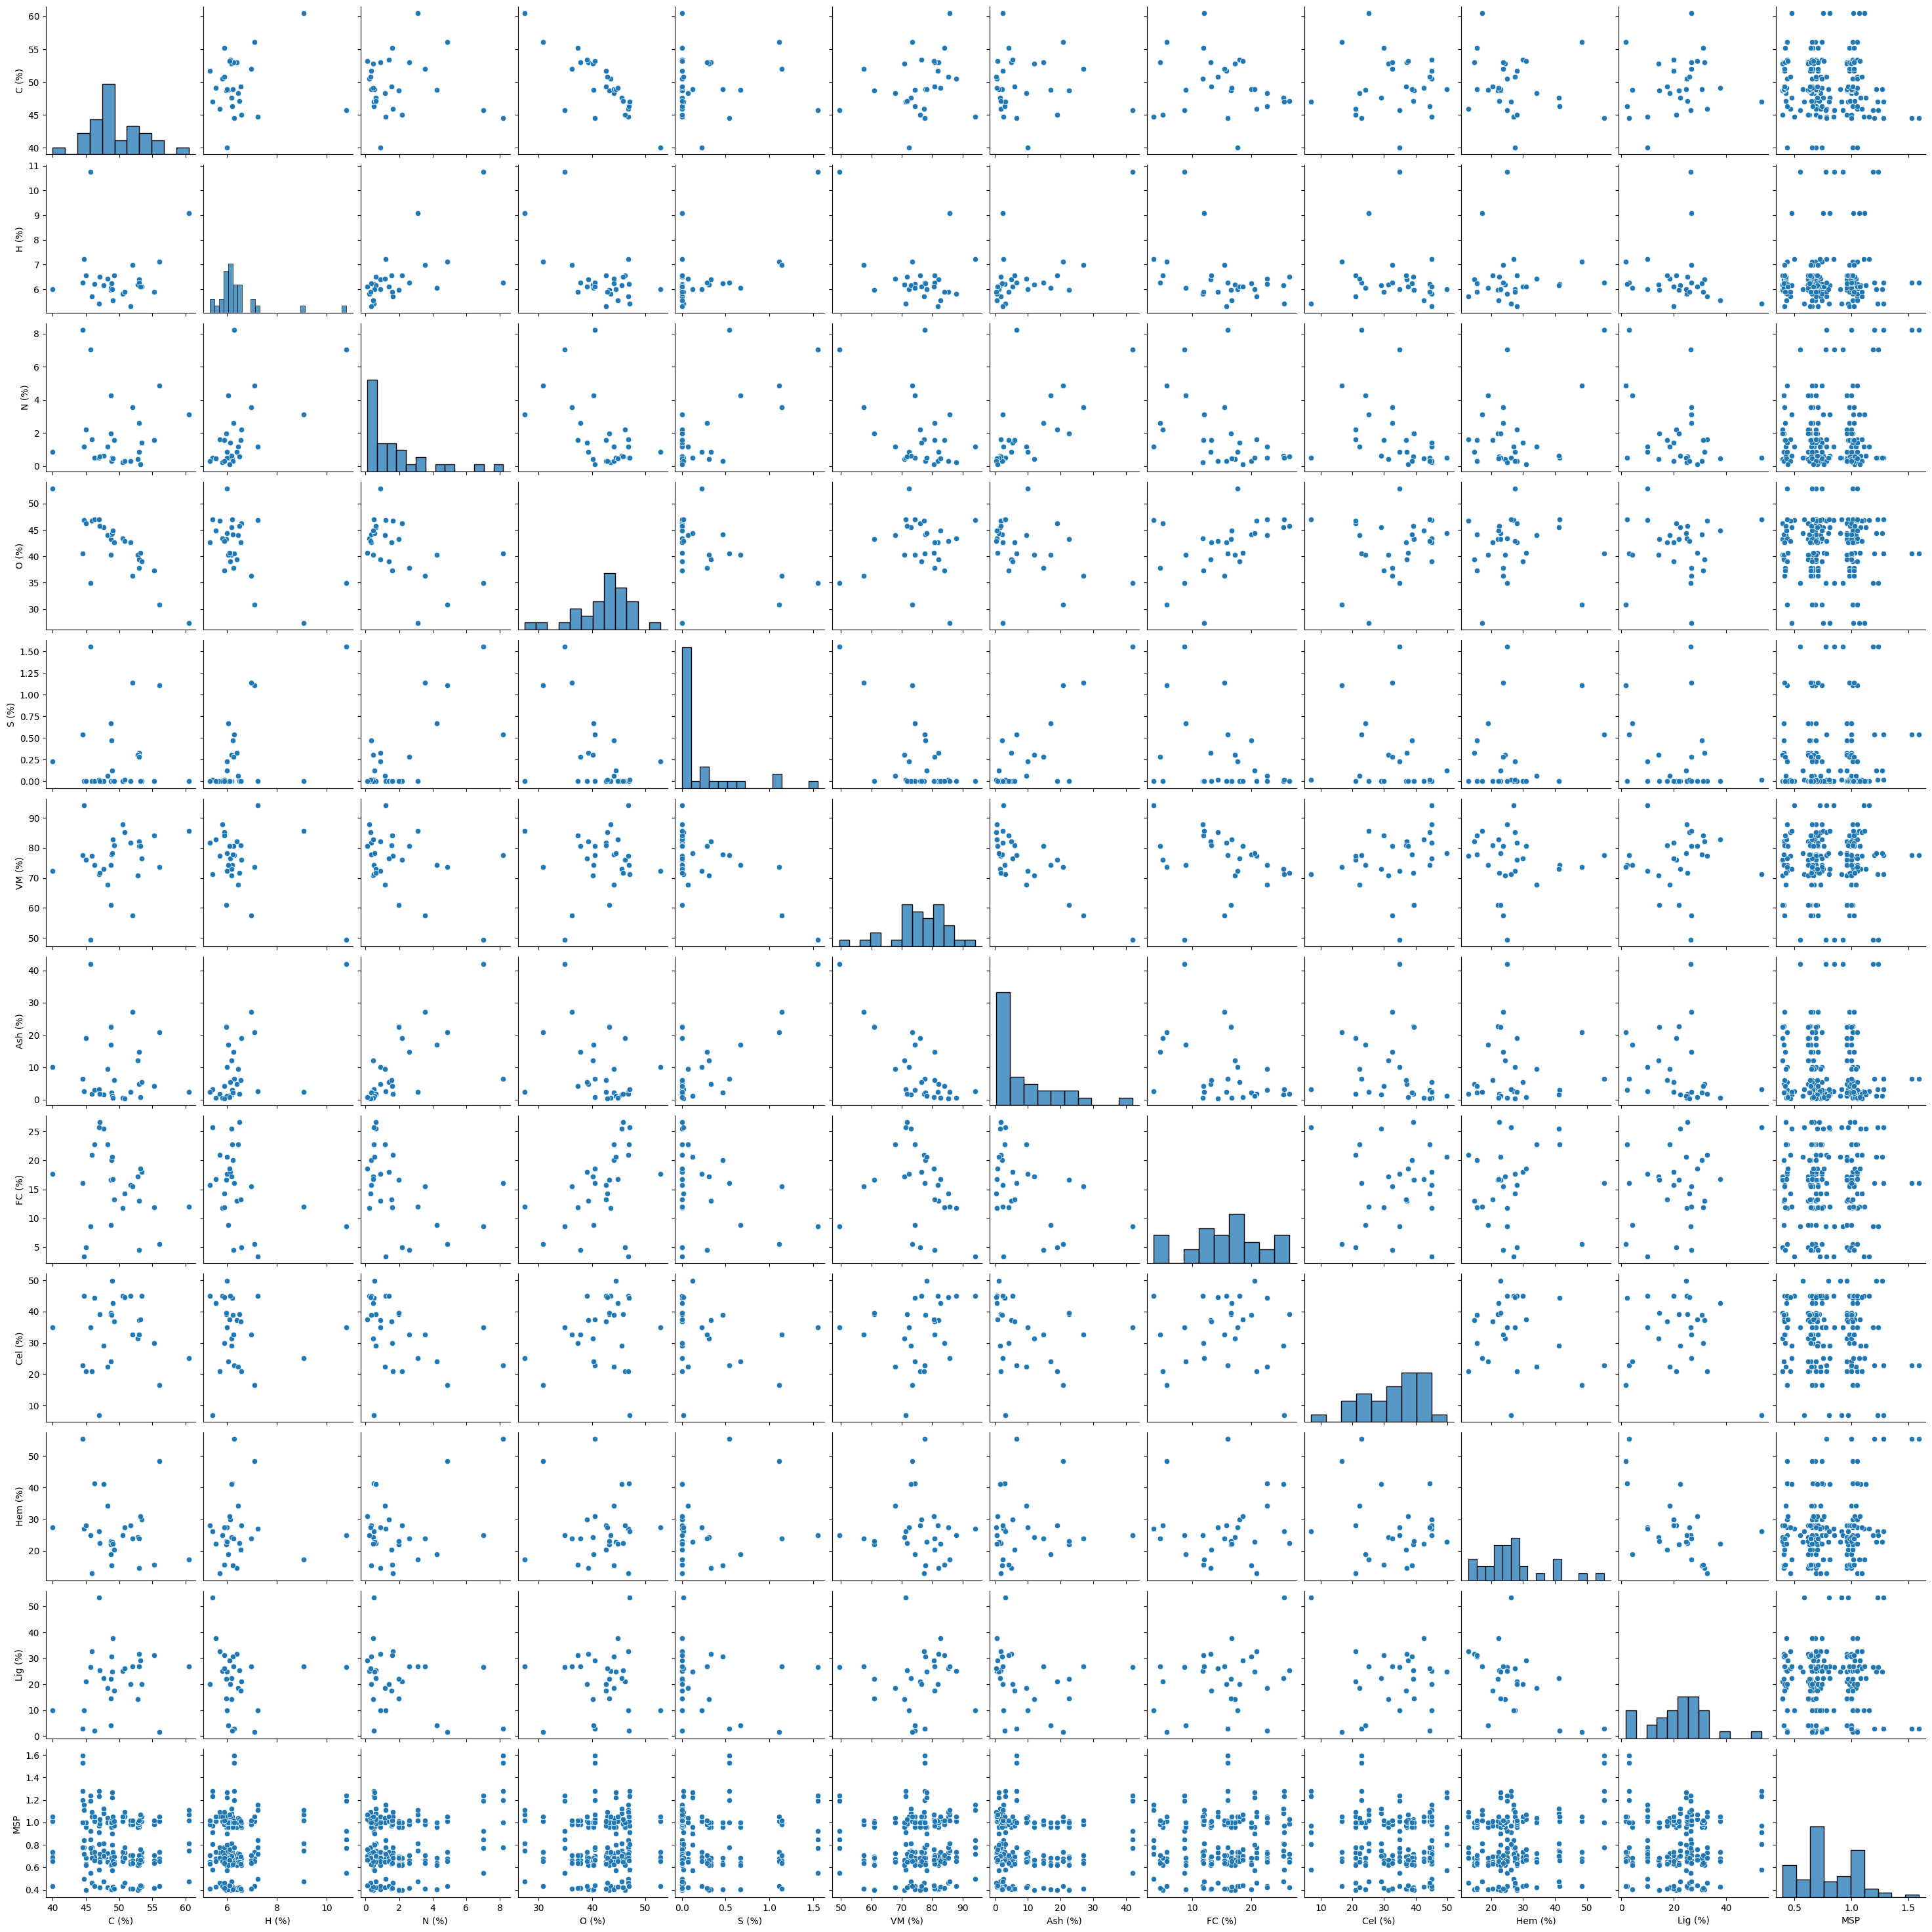

In [ ]:
import matplotlib.pyplot as plt

# Create a scatter plot matrix
sns.pairplot(df_encoded[numeric_cols])

# Show the plot
plt.show()

Higher values of Hem% and N% seem to correlate to a higher MSP. There also seems to be some values of all numerical values that correlate to a higher MSP, but it it hard to see from the pairplot.

Dealing with multicollinearity

Oxygen and Sulfur as well as VM and Ash are highly correlated to one another, and are very similar in their description of the data.

Since Sulfur and Ash are correlated with one another I will drop Oxygen and VM since those two columns aren't strongly correlated with anything else

In [ ]:
# Drop the 'O (%)' and 'VM (%)' columns
df = df.drop(['O (%)', 'VM (%)'], axis=1)

# Print the modified DataFrame
print(df.head)

KeyError: "['O (%)', 'VM (%)'] not found in axis"

Final Thoughts

N% and Hem% appear to be the most important variables in terms of their correlations with MSP. Sulfur and Ash being highly correlated was interesting, but it does make sense. Other than that, there doesn't seem to be any strong correlations with MSP.